### EVI TS Analysis

#### read NC files of EVI

In [1]:
# env set up
# source /g/data/oe9/login_script.sh
# source activate geo
# jupyter notebook
import numpy as np
import glob
import xarray as xr
import pandas as pd

In [61]:
evi_chunk=[]
year = np.arange(2000,2001)
for yeari in year:
    ncpath = '/g/data/oe9/user/rg6346/VI_mask_nc/EVI/EVI_'+str(yeari)+'.nc'
    # read yearly dataset in nc
    yearnc = xr.open_dataset(ncpath, autoclose = True)
    #yearnc = yearnc.drop('band')
    #yearevi = yearnc.rename({'ndvi_evi': 'evi'})
    print(yearevi)
# yearevi    
# yearevi.evi.plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')
    #evi_chunk.append(yearevi.chunk(chunks={'lat':10}))
#evi_chunk

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 20)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    evi      (time, lat, long) float64 ...


In [60]:
aa=evi_chunk[0]

type(aa)
type(yearevi)

xarray.core.dataset.Dataset

In [119]:
    #evi_chunk.append(yearevi.chunk(chunks={'lat':10}))
h=yearnc.chunk(chunks={'time':10})
np.array(h.ndvi_evi.mean(dim=['lat','long']))

RuntimeError: NetCDF: Not a valid ID

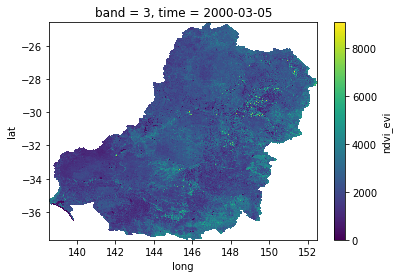

In [91]:
yearnc.ndvi_evi.isel(time=1).plot()

In [3]:
EVI = xr.concat([i for i in evi_chunk], dim = 'time')
EVI


<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    evi      (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 10, 3344)>

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
hh=sinevi.sel(lat=slice(-24,-34),time='2000-03-05')
print(hh)
aa=list(hh)
aa

<xarray.DataArray 'evi' (lat: 2262, long: 3344)>
dask.array<shape=(2262, 3344), dtype=float64, chunksize=(10, 3344)>
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
    time     datetime64[ns] 2000-03-05
Attributes:
    crs:        +init=epsg:4326
    res:        [ 0.00416201  0.00416201]
    is_tiled:   1
    transform:  [  4.16200895e-03   0.00000000e+00   1.38565764e+02   0.00000...


[<xarray.DataArray 'evi' (long: 3344)>
 dask.array<shape=(3344,), dtype=float64, chunksize=(3344,)>
 Coordinates:
     lat      float64 -24.59
   * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
     time     datetime64[ns] 2000-03-05
 Attributes:
     crs:        +init=epsg:4326
     res:        [ 0.00416201  0.00416201]
     is_tiled:   1
     transform:  [  4.16200895e-03   0.00000000e+00   1.38565764e+02   0.00000...,
 <xarray.DataArray 'evi' (long: 3344)>
 dask.array<shape=(3344,), dtype=float64, chunksize=(3344,)>
 Coordinates:
     lat      float64 -24.59
   * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
     time     datetime64[ns] 2000-03-05
 Attributes:
     crs:        +init=epsg:4326
     res:        [ 0.00416201  0.00416201]
     is_tiled:   1
     transform:  [  4.16200895e-03   0.00000000e+00   1.38565764e+02   0.00000...,
 <xarray.DataArray 'evi' (long: 3344)>
 dask.array<shape=(3344,), dtype=float64, chunksize

In [37]:
fig = plt.figure(figsize=(6, 3.2))

#ax = fig.add_subplot(111)
#ax.set_title('colorMap')
plt.imshow(hh.values)
# ax.set_aspect('equal')

RuntimeError: NetCDF: Not a valid ID

#### save into pickle

In [50]:
import pickle
output = open('/g/data/oe9/user/rg6346/VI_mask_nc/pickle_evi.pkl', 'wb')
pickle.dump(EVI, output)
output.close()

#### read pickle

In [51]:
pkfile = '/g/data/oe9/user/rg6346/VI_mask_nc/pickle_evi.pkl'
pkevi = pickle.load(open(pkfile, 'rb'))
pkevi

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    evi      (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 10, 3344)>

#### try to plot time series of EVI

In [24]:
# import xarray.ufuncs as xu
sinevi = EVI.evi

sinevi
# EVI.evi.isel(time=range(100,106)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')

<xarray.DataArray 'evi' (time: 388, lat: 3147, long: 3344)>
dask.array<shape=(388, 3147, 3344), dtype=float64, chunksize=(20, 10, 3344)>
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Attributes:
    crs:        +init=epsg:4326
    res:        [ 0.00416201  0.00416201]
    is_tiled:   1
    transform:  [  4.16200895e-03   0.00000000e+00   1.38565764e+02   0.00000...

In [30]:
sinevi.sel(lat=slice(-24,-34),time='2000-03-05').plot()

RuntimeError: NetCDF: Not a valid ID